### 1.Defining Problem Statement and Analysing basic metrics

**Problem Statement:**

**The primary objective is to identify the characteristics of the target audience for each type of treadmill offered by AeroFit. This involves investigating potential differences across products concerning customer characteristics. The focus is on creating a customer profile for each treadmill product to enhance recommendations for new customers**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sample_data/aerofit_treadmill.csv')


In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [7]:
print('Data Types: ')
print(df.dtypes)

Data Types: 
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [8]:
df.info() # provides summary information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [10]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [11]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
df.describe() #returns statistical summary of only numeric columns

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [13]:
df.describe(include='object').T # this gives statistical summary of all columns

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


### 2 .Non-Graphical Analysis: Value counts and unique attributes

In [14]:
df.nunique() # Gives count of unique values in each colum

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [15]:
for i in df.columns:   # to get unique values and count of unique values
    print(f"{i} Column has \n{df[i].unique()} values and \n{len(df[i].unique())} unique items\n\n")

Product Column has 
['KP281' 'KP481' 'KP781'] values and 
3 unique items


Age Column has 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] values and 
32 unique items


Gender Column has 
['Male' 'Female'] values and 
2 unique items


Education Column has 
[14 15 12 13 16 18 20 21] values and 
8 unique items


MaritalStatus Column has 
['Single' 'Partnered'] values and 
2 unique items


Usage Column has 
[3 2 4 5 6 7] values and 
6 unique items


Fitness Column has 
[4 3 2 1 5] values and 
5 unique items


Income Column has 
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641

### 3 .Missing Value & Outlier Detection

In [16]:
df.isnull().sum()  # From below data we can confrim no missing vales in given data and no need for pre-processing

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Outlier**

In [17]:
df.nunique() # So for Age,Income and Miles we can find outliers as theey are continouos rest are categorical values

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

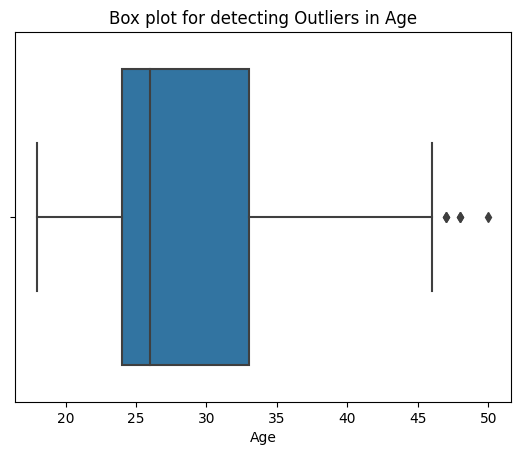

In [18]:
sns.boxplot(data=df,x='Age')
plt.title('Box plot for detecting Outliers in Age')
plt.show()

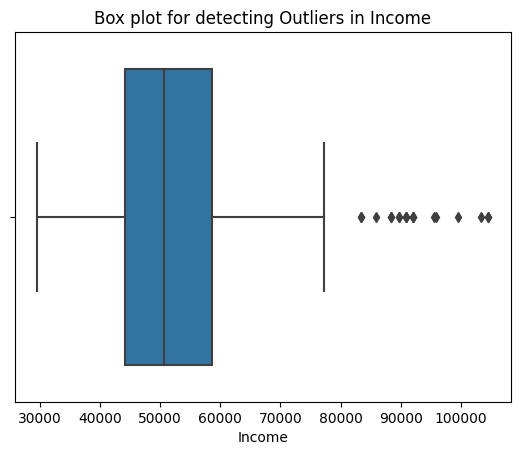

In [19]:
sns.boxplot(data=df,x='Income')
plt.title('Box plot for detecting Outliers in Income')
plt.show()

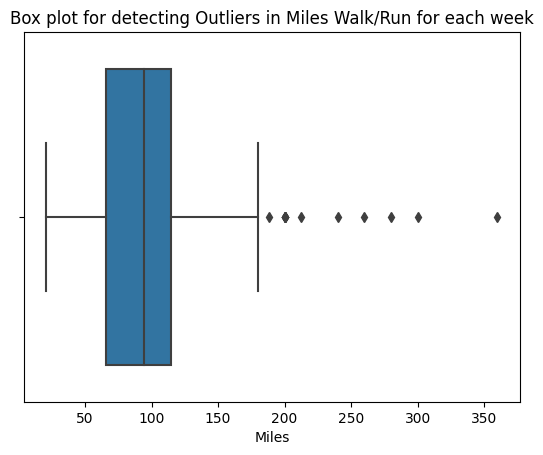

In [20]:
sns.boxplot(data=df,x='Miles')
plt.title('Box plot for detecting Outliers in Miles Walk/Run for each week')
plt.show()

### 4 .Visual Analysis - Univariate & Bivariate

Understanding the distribution of the data for the quantitative attributes:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

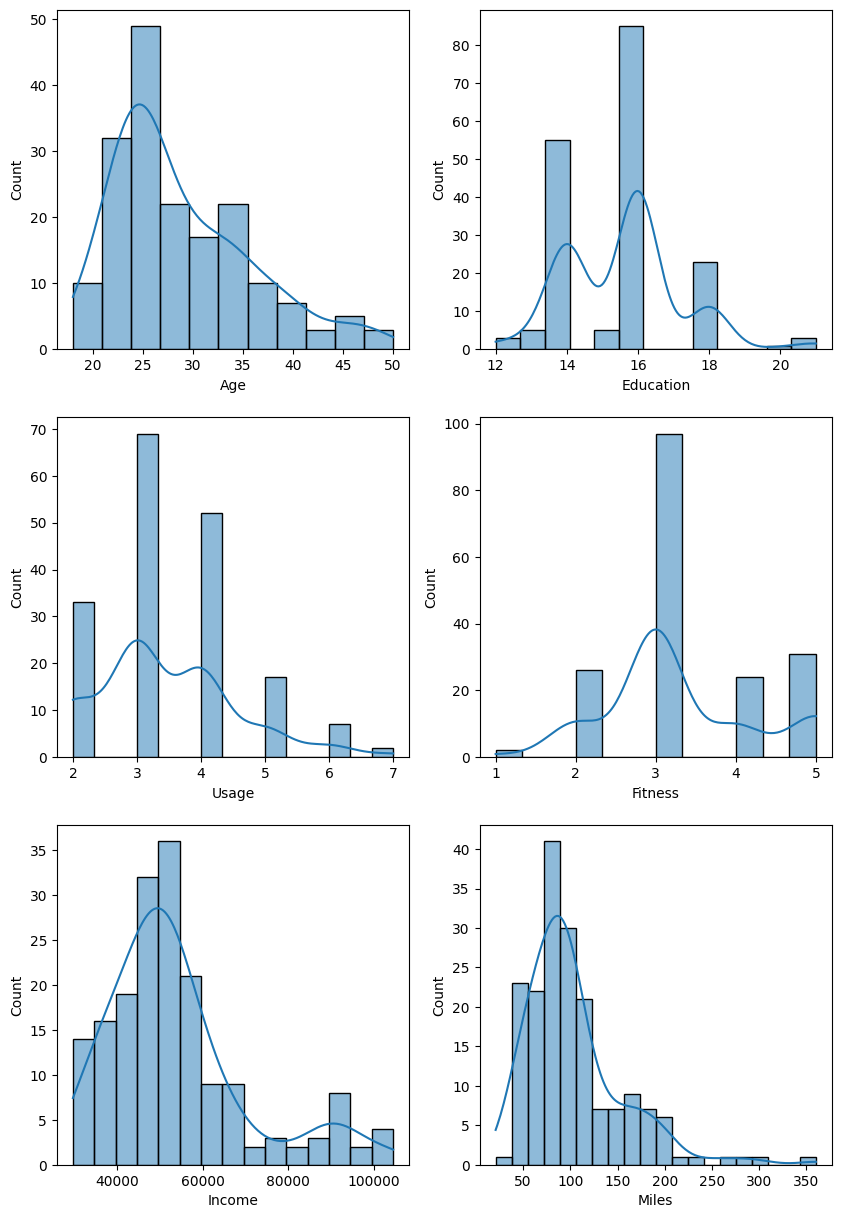

In [21]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.histplot(data=df, x="Age", kde=True)
plt.subplot(3,2,2)
sns.histplot(data=df, x="Education", kde=True)
plt.subplot(3,2,3)
sns.histplot(data=df, x="Usage", kde=True)
plt.subplot(3,2,4)
sns.histplot(data=df, x="Fitness", kde=True)
plt.subplot(3,2,5)
sns.histplot(data=df, x="Income", kde=True)
plt.subplot(3,2,6)
sns.histplot(data=df, x="Miles", kde=True)
plt.show()

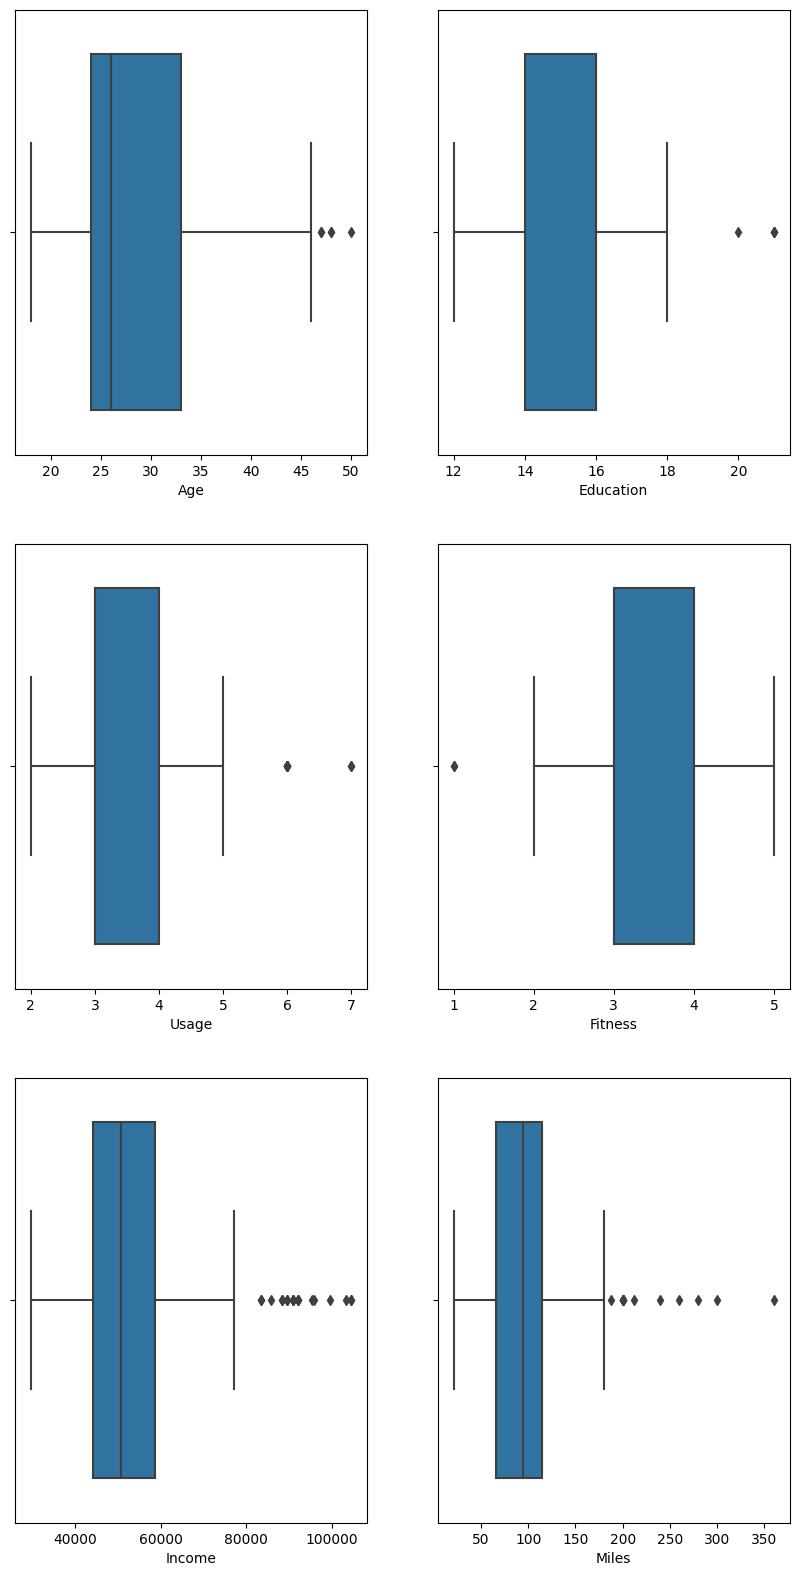

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 17))
fig.subplots_adjust(top=1.0)
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

In [23]:
outlier_detection = []

continuous_variables = ['Age', 'Income', 'Usage', 'Fitness', 'Miles', 'Education']

for col in continuous_variables:
  mean_val = df[col].mean()
  median_val = df[col].median()
  diff_val = mean_val-median_val
  outlier_detection.append({'Variable':col,'Mean':mean_val,'Median':median_val,'Difference':diff_val})

outlier_detection_df = pd.DataFrame(outlier_detection)
outlier_detection_df.set_index('Variable',inplace=True)

outlier_detection_df

,Mean,Median,Difference
Variable,,,
Age,28.788889,26.0,2.788889
Income,53719.577778,50596.5,3123.077778
Usage,3.455556,3.0,0.455556
Fitness,3.311111,3.0,0.311111
Miles,103.194444,94.0,9.194444
Education,15.572222,16.0,-0.427778




**Observations:**
1. Difference between Mean and Median is more for Miles and Income which shows that data is more spreaded and outliers are more
2. Whereas for remaining columns data is less spread and less outliers

Understanding the distribution of the data for the qualitative attributes:
1. Product
2. Gender
3. MaritalStatus

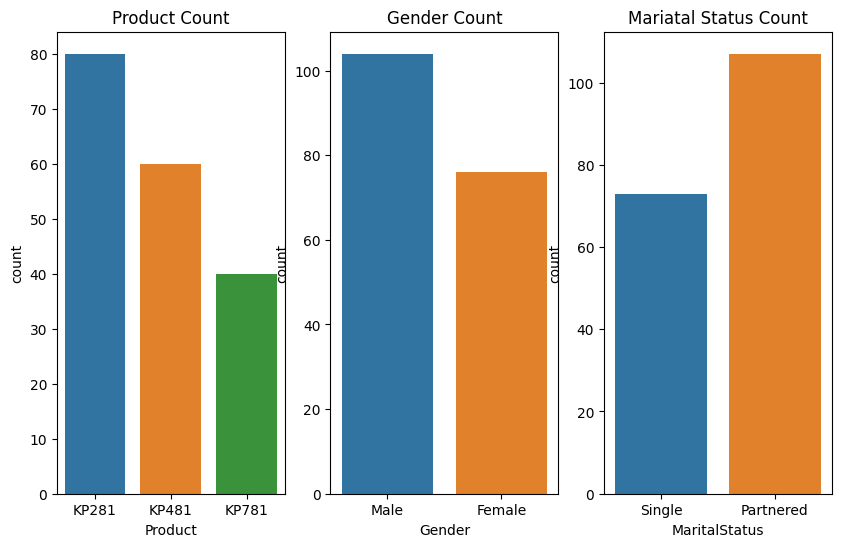

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('Product Count')
sns.countplot(data=df, x="Product")
plt.subplot(1,3,2)
plt.title('Gender Count')
sns.countplot(data=df, x="Gender")
plt.subplot(1,3,3)
plt.title('Mariatal Status Count')
sns.countplot(data=df, x="MaritalStatus")
plt.show()

**Observations**
1. KP281 is the most frequent product.
2. Male count is more in data compared to Female.
3. Comitted people are more in data


**For correlation: Heatmaps, Pairplots**

In [25]:
# Heat map can be formed only with numerical rows
numerical_columns = df.select_dtypes(exclude=['object']).columns
heatmap_df = df[numerical_columns]
heatmap_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


<Axes: >

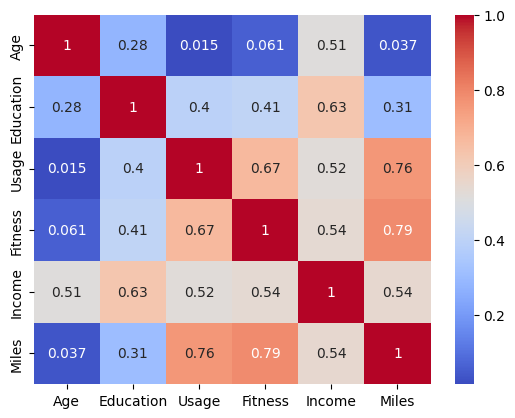

In [26]:
sns.heatmap(heatmap_df.corr(), annot = True, cmap = "coolwarm")

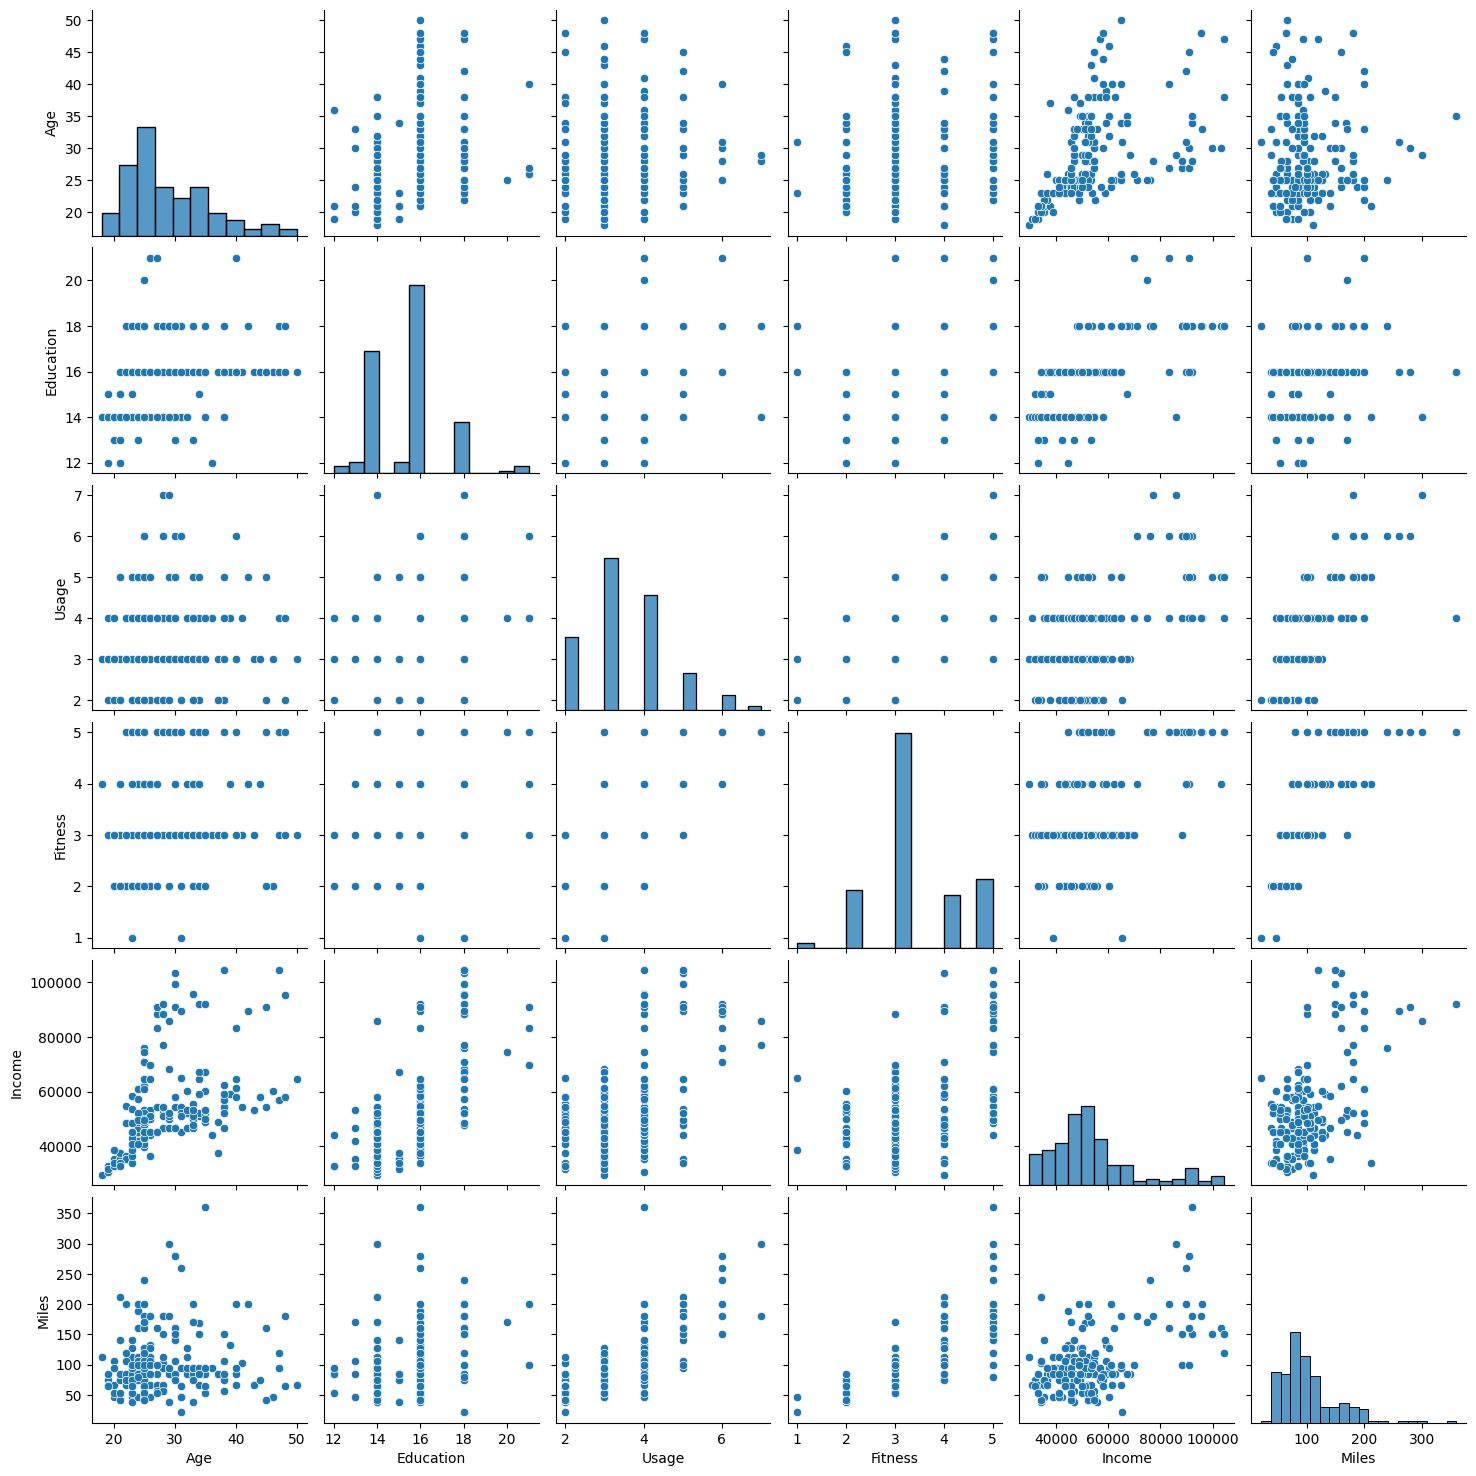

In [27]:
sns.pairplot(data = df)

### 5. Business Insights based on Non-Graphical and Visual Analysis
1. Comments on the range of attributes
2. Comments on the distribution of the variables and relationship between them
3. Comments for each univariate and bivariate plot

In [28]:
outlier_detection_df

,Mean,Median,Difference
Variable,,,
Age,28.788889,26.0,2.788889
Income,53719.577778,50596.5,3123.077778
Usage,3.455556,3.0,0.455556
Fitness,3.311111,3.0,0.311111
Miles,103.194444,94.0,9.194444
Education,15.572222,16.0,-0.427778


**Comment on ranges**

1. **Based on the insights derived from the outlier detection section, we observed that the variables "Income" and "Miles" exhibit a notable spread, as evidenced by a considerable difference between their mean and median values.**

In [29]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


2. **This shows that Most purchased product is KP281 by gender Male who marital ststus is Partnered**

**Comments on the distribution of the variables and relationship between them**
1. From the pair plot and co relation table we can see that most of the variables are independent except a few. Lets check them here

In [30]:
heatmap_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


**If we consider corr val >0.6 as co-related we can get pairs like (Age,Fitness),(Education,Income),(Usage,Fitness),(Usage,Miles) which are more co-related**

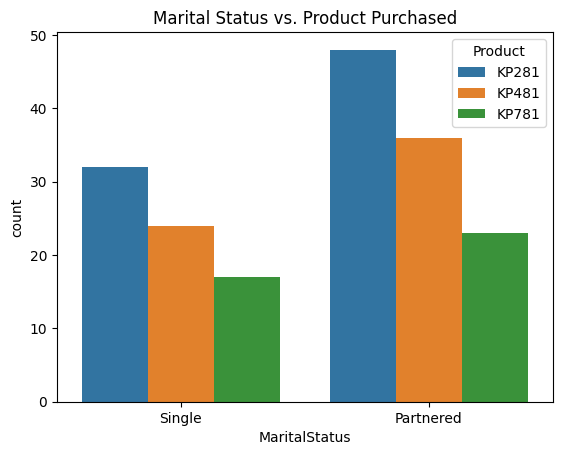

In [31]:
# Relationship between the categorical variables and the output variable in the data.)
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Marital Status vs. Product Purchased')
plt.show()

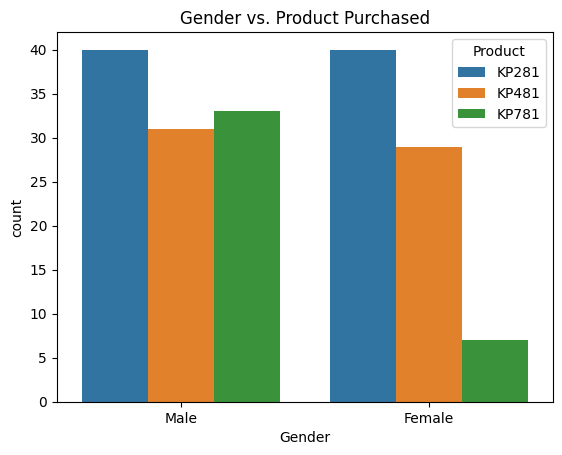

In [32]:
sns.countplot(x='Gender', hue='Product', data=df)
plt.title('Gender vs. Product Purchased')
plt.show()

**Observation:**

1. For all the available categorical columms MaritalStatus and Gender the most preferred product is KP281
2. For Females 2nd preferred product is KP481 where as for male it is KP781

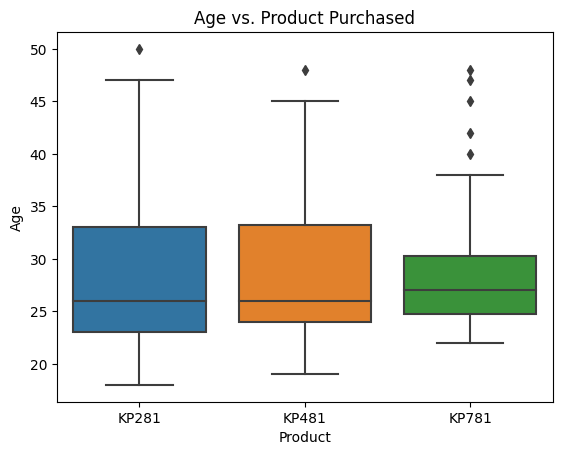

In [33]:
sns.boxplot(x='Product',y='Age', data=df)
plt.title('Age vs. Product Purchased')
plt.show()

**KP281 and KP481 is preferred by most of Age Groups**

In [34]:
# Above data can be confirmed by below code as well
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df) * 100

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

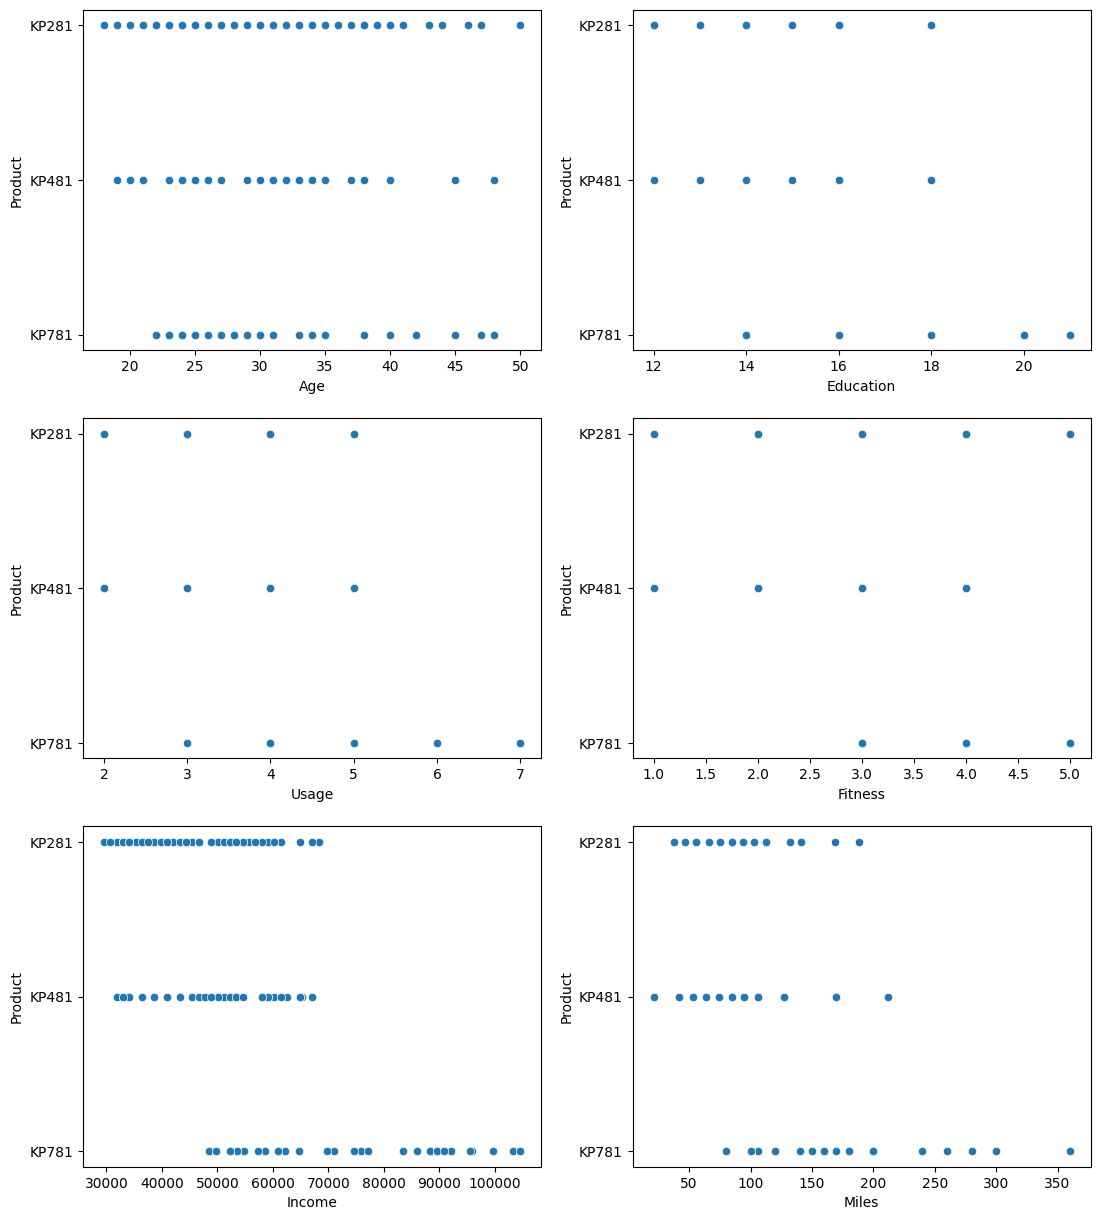

In [35]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(13, 13))
fig.subplots_adjust(top=1.0)
sns.scatterplot(data=df, x="Age", y= 'Product', ax=axis[0,0])
sns.scatterplot(data=df, x="Education", y='Product', ax=axis[0,1])
sns.scatterplot(data=df, x="Usage", y='Product', ax=axis[1,0])
sns.scatterplot(data=df, x="Fitness", y='Product', ax=axis[1,1])
sns.scatterplot(data=df, x="Income", y='Product', ax=axis[2,0])
sns.scatterplot(data=df, x="Miles", y='Product', ax=axis[2,1])
plt.show()

**Observation:**
1. The data provided have less data points and most of columns have <=10 unique values thats why the scatter plot we have against Product forms different clusters

**The marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)**

In [36]:
# probabilities of buying different Products can be calculated like this
product_cross_tab = pd.crosstab(index=df['Product'], columns='count', normalize=True) * 100
product_cross_tab

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


**KP281 is most bought product followed by KP481 and KP781 which is observed many times in previous analysis**

In [37]:
# Categorical columns for which we want to calculate probabilities
categorical_columns = ['Gender', 'MaritalStatus', 'Education','Fitness','Usage']

for col in categorical_columns:
    conditional_prob = pd.crosstab(index=df['Product'], columns=df[col], normalize='columns') * 100
    print(f"\nConditional Probability based on {col}:")
    print(conditional_prob)


Conditional Probability based on Gender:
Gender      Female       Male
Product                      
KP281    52.631579  38.461538
KP481    38.157895  29.807692
KP781     9.210526  31.730769

Conditional Probability based on MaritalStatus:
MaritalStatus  Partnered     Single
Product                            
KP281          44.859813  43.835616
KP481          33.644860  32.876712
KP781          21.495327  23.287671

Conditional Probability based on Education:
Education         12    13         14    15         16         18     20  \
Product                                                                    
KP281      66.666667  60.0  54.545455  80.0  45.882353   8.695652    0.0   
KP481      33.333333  40.0  41.818182  20.0  36.470588   8.695652    0.0   
KP781       0.000000   0.0   3.636364   0.0  17.647059  82.608696  100.0   

Education     21  
Product           
KP281        0.0  
KP481        0.0  
KP781      100.0  

Conditional Probability based on Fitness:
Fitness     1  

From the above table we can find conditional probabilty for each column with product column

Eg1:
**Given that a customer is female, what is the probability
she’ll purchase a KP481 is found as 38.16% which can be found in Conditional probabilty based on Gender table**

Eg2:
**Given that a marital status is partnered, what is the probability
KP281 is purchased is found as 44.86% which can be found in Conditional probabilty based on Marital Status table**

**customer profilings for each and every product.**

In [39]:
c = ['Age', 'Gender', 'Income']

for col in df['Product'].unique():
    customer_profile_pro = df[df['Product']==col][c]
    print(f'\nCustomer Profile for {col}:\n',customer_profile_pro.describe(include='all'))


Customer Profile for KP281:
               Age Gender       Income
count   80.000000     80     80.00000
unique        NaN      2          NaN
top           NaN   Male          NaN
freq          NaN     40          NaN
mean    28.550000    NaN  46418.02500
std      7.221452    NaN   9075.78319
min     18.000000    NaN  29562.00000
25%     23.000000    NaN  38658.00000
50%     26.000000    NaN  46617.00000
75%     33.000000    NaN  53439.00000
max     50.000000    NaN  68220.00000

Customer Profile for KP481:
               Age Gender        Income
count   60.000000     60     60.000000
unique        NaN      2           NaN
top           NaN   Male           NaN
freq          NaN     31           NaN
mean    28.900000    NaN  48973.650000
std      6.645248    NaN   8653.989388
min     19.000000    NaN  31836.000000
25%     24.000000    NaN  44911.500000
50%     26.000000    NaN  49459.500000
75%     33.250000    NaN  53439.000000
max     48.000000    NaN  67083.000000

Customer Profil

For Product KP281:
1. Total people who prefer this prouct is 80 out of 180
1. 50% of people who buy their Age is range 23 to 33
2. 50% people Salary is in range 38658 to 53439
3. Male and Female show equal interest to buy this product

For Product KP481:
1. Total people who prefer this prouct is 60 out of 180
1. 50% of people who buy their Age is range 24 to 33
2. 50% people Salary is in range 44911.5 to 53439
3. Male and Female show alomst equal interest to buy this product also

For Product KP781:
1. Total people who prefer this prouct is 40 out of 180
2. 50% of people who buy their Age is range 24 to 30
2. 50% people Salary is in range 58204.75 to 90886
3. This product is preferred mostly by males.

**The Product KP781 is preferred mostly by Males who have more salary**

### 6. Recommendations:

**1. Targeted Marketing Strategies:**

The Prouct KP281,KP481 is famous in both male and female genders with Salary < 6000 but KP781 is used mostly by male with Salary >6000. So Female with >6k salary can be targetted to increase sales of KP781. And also can provide good incentives and No cost EMI oprions for others as well

**2. Product Feature Enhancements:**

The Poduct KP281,KP481 are leading products in market. We can use customer feedback and insights to know what features made them to buy the product and implement the same features in KP781 as well, and also take feedback for any improvements

**3. Customer Engagement:**

For any business to be successfull customer engagement is must and should. Frequently interacting with customer and updating product to their requirements
and implementing customer loyality programs to strengthen their relationship help boost in product sales

**4. Pricing Strategies:**

As we seen above most people prefer KP281,KP481 which prices could be low as people with salary < 6000 prefer these products. Maintaining these price the focus should be on sales of KP781 which can be improved by providing incentives on special days and also provide offers and EMI options

**5. Promotional Campaigns:**

These are part of letting people know about our business and business expansion plan. Promotional campaign can be organised that aligns with diff class customers. Lucky draw contestant can be conducted to reach the word out more

**6.Continuous Monitoring:**

Regularly update customer profiles and conduct ongoing analyses to adapt strategies based on changing market dynamics and customer preferences is must to survive in market